In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import timedelta
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("white", {'axes.grid' : True})
sns.set_palette("tab10", 14)
sns.set_context('talk')

In [2]:
# Reading in the two csv files
atob=pd.read_csv('AtoB_total.csv')
btoc=pd.read_csv('BtoC_total.csv')

In [3]:
# converting travel date as datetime
atob.date = pd.to_datetime(atob.date, dayfirst=True)
# converting travel dates into days of the week
atob['day'] = atob.date.dt.weekday
atob['day'] = atob['day'].map({0:'Mon', 1:'Tue', 2:'Wed', 3:'Thur', 4:'Fri', 5:'Sat', 6:'Sun'})

# converting travel date as datetime
btoc.date = pd.to_datetime(btoc.date, dayfirst=True)
# converting travel dates into days of the week
btoc['day'] = btoc.date.dt.weekday
btoc['day'] = btoc['day'].map({0:'Mon', 1:'Tue', 2:'Wed', 3:'Thur', 4:'Fri', 5:'Sat', 6:'Sun'})


In [4]:
atob.describe()

,daily_mean,daily_min,daily_max,am_mean,am_min,am_max,pm_mean,pm_min,pm_max,mid_mean,mid_min,mid_max,eve_mean,eve_min,eve_max,em_mean,em_min,em_max
count,198.000000,198.000000,198.000000,13.000000,13.000000,13.000000,1.0,1.0,1.0,63.000000,63.000000,63.000000,26.000000,26.000000,26.000000,16.000000,16.000000,16.000000
mean,2129.661616,1503.949495,3056.070707,2536.846154,1945.153846,3314.615385,2015.0,1609.0,2523.0,2101.587302,1576.825397,2891.126984,1972.807692,1467.230769,2680.692308,2043.875000,1471.437500,2879.437500
std,381.773023,228.235779,804.619748,675.562586,543.050158,864.582417,NaN,NaN,NaN,352.987098,266.296617,989.434499,453.957973,221.234049,929.325767,393.477467,182.274141,901.171236
min,1391.000000,599.000000,1608.000000,1538.000000,1205.000000,1964.000000,2015.0,1609.0,2523.0,1324.000000,688.000000,1481.000000,1395.000000,1071.000000,1817.000000,1296.000000,1186.000000,1416.000000
25%,1841.500000,1350.000000,2456.000000,1956.000000,1441.000000,2654.000000,2015.0,1609.0,2523.0,1872.500000,1438.000000,2351.500000,1774.500000,1347.500000,2181.500000,1780.500000,1293.500000,2427.750000
50%,2099.500000,1492.500000,2883.500000,2617.000000,2071.000000,3305.000000,2015.0,1609.0,2523.0,2099.000000,1612.000000,2616.000000,1897.000000,1430.000000,2452.500000,2073.500000,1485.500000,2824.500000
75%,2320.500000,1633.000000,3495.500000,3247.000000,2472.000000,4111.000000,2015.0,1609.0,2523.0,2278.500000,1748.000000,3029.000000,2010.750000,1597.000000,2727.750000,2232.000000,1619.500000,3067.250000
max,3212.000000,2229.000000,5975.000000,3385.000000,2607.000000,4493.000000,2015.0,1609.0,2523.0,3266.000000,2172.000000,7900.000000,3662.000000,2182.000000,6147.000000,3036.000000,1750.000000,5513.000000


In [5]:
btoc.describe()

,daily_mean,daily_min,daily_max,am_mean,am_min,am_max,pm_mean,pm_min,pm_max,mid_mean,mid_min,mid_max,eve_mean,eve_min,eve_max,em_mean,em_min,em_max
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,514.840580,219.908213,1207.855072,477.391304,231.072464,991.512077,713.603865,309.705314,1659.169082,583.159420,275.980676,1235.371981,383.038647,163.763285,904.241546,278.613527,131.719807,590.473430
std,161.891576,61.230238,425.278913,163.613375,82.475943,345.918348,334.114098,141.552402,832.819311,183.884616,88.401773,396.991687,130.764512,40.336293,410.163488,35.210124,14.191435,95.605368
min,222.000000,109.000000,450.000000,173.000000,83.000000,351.000000,226.000000,115.000000,422.000000,215.000000,102.000000,426.000000,214.000000,101.000000,390.000000,173.000000,91.000000,329.000000
25%,371.500000,161.000000,833.000000,316.000000,148.000000,669.500000,357.500000,158.000000,789.000000,448.500000,204.500000,977.000000,297.000000,139.000000,632.000000,256.000000,121.500000,527.500000
50%,566.000000,242.000000,1323.000000,523.000000,246.000000,1086.000000,795.000000,328.000000,1869.000000,629.000000,300.000000,1308.000000,350.000000,154.000000,804.000000,278.000000,132.000000,593.000000
75%,638.500000,266.000000,1512.500000,605.000000,294.500000,1248.000000,960.500000,417.000000,2280.500000,710.500000,336.000000,1496.500000,434.000000,178.000000,1035.000000,303.500000,141.000000,660.000000
max,905.000000,365.000000,2241.000000,858.000000,412.000000,1998.000000,1597.000000,751.000000,3622.000000,984.000000,457.000000,2157.000000,1171.000000,428.000000,3209.000000,365.000000,164.000000,819.000000


### Goal originally to fill gaps in time frame data for each day with the daily mean.On reflection this may confuse more as so little data perhaps best to simply ignore altogether and avoid distoritions. Difference between daily mean and time frame mean was mean 35 secs, sd 240 secs so potential to be distorting and not good data so now all atob will be replaced with daily mean and the specifics time frame variation will be added only in btoc

In [9]:
times_measures = ['mean', 'min', 'max']
times_mean = ['am_', 'mid_', 'pm_', 'eve_', 'em_']
for measure in times_measures:
    times_mean = ['am_'+ measure, 'mid_'+ measure, 'pm_'+measure, 'eve_'+measure, 'em_'+measure]
    for times in times_mean: 
        atob[times] = atob['daily_' + measure]
atob.head(10)

,date,origin,dest,daily_mean,daily_min,daily_max,am_mean,am_min,am_max,pm_mean,...,mid_mean,mid_min,mid_max,eve_mean,eve_min,eve_max,em_mean,em_min,em_max,day
0,2017-10-16,A,B,2204.0,1720.0,2824.0,2204.0,1720.0,2824.0,2204.0,...,2204.0,1720.0,2824.0,2204.0,1720.0,2824.0,2204.0,1720.0,2824.0,Mon
1,2017-10-17,A,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tue
2,2017-10-18,A,B,2150.0,1514.0,3053.0,2150.0,1514.0,3053.0,2150.0,...,2150.0,1514.0,3053.0,2150.0,1514.0,3053.0,2150.0,1514.0,3053.0,Wed
3,2017-10-19,A,B,2182.0,1383.0,3441.0,2182.0,1383.0,3441.0,2182.0,...,2182.0,1383.0,3441.0,2182.0,1383.0,3441.0,2182.0,1383.0,3441.0,Thur
4,2017-10-20,A,B,1743.0,1360.0,2233.0,1743.0,1360.0,2233.0,1743.0,...,1743.0,1360.0,2233.0,1743.0,1360.0,2233.0,1743.0,1360.0,2233.0,Fri
5,2017-10-21,A,B,1512.0,1272.0,1798.0,1512.0,1272.0,1798.0,1512.0,...,1512.0,1272.0,1798.0,1512.0,1272.0,1798.0,1512.0,1272.0,1798.0,Sat
6,2017-10-22,A,B,1827.0,1571.0,2125.0,1827.0,1571.0,2125.0,1827.0,...,1827.0,1571.0,2125.0,1827.0,1571.0,2125.0,1827.0,1571.0,2125.0,Sun
7,2017-10-23,A,B,2504.0,1725.0,3633.0,2504.0,1725.0,3633.0,2504.0,...,2504.0,1725.0,3633.0,2504.0,1725.0,3633.0,2504.0,1725.0,3633.0,Mon
8,2017-10-24,A,B,1649.0,1276.0,2131.0,1649.0,1276.0,2131.0,1649.0,...,1649.0,1276.0,2131.0,1649.0,1276.0,2131.0,1649.0,1276.0,2131.0,Tue
9,2017-10-25,A,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wed


In [10]:
# Identifying any remaining NaNs
atob[atob['daily_mean'].isnull()]

,date,origin,dest,daily_mean,daily_min,daily_max,am_mean,am_min,am_max,pm_mean,...,mid_mean,mid_min,mid_max,eve_mean,eve_min,eve_max,em_mean,em_min,em_max,day
1,2017-10-17,A,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tue
9,2017-10-25,A,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wed
11,2017-10-27,A,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fri
14,2017-10-30,A,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mon
42,2017-11-27,A,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mon
105,2018-01-29,A,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mon
119,2018-02-12,A,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mon
127,2018-02-20,A,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tue
135,2018-02-28,A,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wed


In [13]:
# Changing NaNs on a Tuesday to a Tuesday value one week further on
col = list(range(3,21))
nulls=[1,127]
for x in col:
    for y in nulls:
        atob.iloc[[y], x] = atob.iat[y+7,x]
atob.iloc[[1,127],3:21]

,daily_mean,daily_min,daily_max,am_mean,am_min,am_max,pm_mean,pm_min,pm_max,mid_mean,mid_min,mid_max,eve_mean,eve_min,eve_max,em_mean,em_min,em_max
1,1649.0,1276.0,2131.0,1649.0,1276.0,2131.0,1649.0,1276.0,2131.0,1649.0,1276.0,2131.0,1649.0,1276.0,2131.0,1649.0,1276.0,2131.0
127,2764.0,1939.0,3940.0,2764.0,1939.0,3940.0,2764.0,1939.0,3940.0,2764.0,1939.0,3940.0,2764.0,1939.0,3940.0,2764.0,1939.0,3940.0


In [15]:
# Changing NaNs on Wednesday to another Wednesday values
col = list(range(3,21))
nulls = [9,135]
for x in col:
    for y in nulls:
        atob.iloc[[y], x] = atob.iat[y+7,x]
atob.iloc[[9,135],3:21]

,daily_mean,daily_min,daily_max,am_mean,am_min,am_max,pm_mean,pm_min,pm_max,mid_mean,mid_min,mid_max,eve_mean,eve_min,eve_max,em_mean,em_min,em_max
9,1700.0,1440.0,2006.0,1700.0,1440.0,2006.0,1700.0,1440.0,2006.0,1700.0,1440.0,2006.0,1700.0,1440.0,2006.0,1700.0,1440.0,2006.0
135,2126.0,1582.0,2857.0,2126.0,1582.0,2857.0,2126.0,1582.0,2857.0,2126.0,1582.0,2857.0,2126.0,1582.0,2857.0,2126.0,1582.0,2857.0


In [16]:
# Changing NaNs on Friday to another Friday values
col = list(range(3,21))
for x in col:
    atob.iloc[[11], x] = atob.iat[18,x]
atob.iloc[[11],3:21]

,daily_mean,daily_min,daily_max,am_mean,am_min,am_max,pm_mean,pm_min,pm_max,mid_mean,mid_min,mid_max,eve_mean,eve_min,eve_max,em_mean,em_min,em_max
11,2122.0,1579.0,2852.0,2122.0,1579.0,2852.0,2122.0,1579.0,2852.0,2122.0,1579.0,2852.0,2122.0,1579.0,2852.0,2122.0,1579.0,2852.0


In [17]:
# Changing NaNs on Monday to another monday values
col = list(range(3,21))
nulls = [14,42,105,119]
for x in col:
    for y in nulls:
        atob.iloc[[y], x] = atob.iat[y+7,x]
atob.iloc[[14,42,105,119],3:21]

,daily_mean,daily_min,daily_max,am_mean,am_min,am_max,pm_mean,pm_min,pm_max,mid_mean,mid_min,mid_max,eve_mean,eve_min,eve_max,em_mean,em_min,em_max
14,1773.0,1330.0,2365.0,1773.0,1330.0,2365.0,1773.0,1330.0,2365.0,1773.0,1330.0,2365.0,1773.0,1330.0,2365.0,1773.0,1330.0,2365.0
42,1649.0,1305.0,2085.0,1649.0,1305.0,2085.0,1649.0,1305.0,2085.0,1649.0,1305.0,2085.0,1649.0,1305.0,2085.0,1649.0,1305.0,2085.0
105,2897.0,1981.0,4236.0,2897.0,1981.0,4236.0,2897.0,1981.0,4236.0,2897.0,1981.0,4236.0,2897.0,1981.0,4236.0,2897.0,1981.0,4236.0
119,2206.0,1482.0,3283.0,2206.0,1482.0,3283.0,2206.0,1482.0,3283.0,2206.0,1482.0,3283.0,2206.0,1482.0,3283.0,2206.0,1482.0,3283.0


In [18]:
# Any nan remaining?
atob[atob['daily_mean'].isnull()]

,date,origin,dest,daily_mean,daily_min,daily_max,am_mean,am_min,am_max,pm_mean,...,mid_mean,mid_min,mid_max,eve_mean,eve_min,eve_max,em_mean,em_min,em_max,day


In [19]:
atob.columns

Index(['date', 'origin', 'dest', 'daily_mean', 'daily_min', 'daily_max',
       'am_mean', 'am_min', 'am_max', 'pm_mean', 'pm_min', 'pm_max',
       'mid_mean', 'mid_min', 'mid_max', 'eve_mean', 'eve_min', 'eve_max',
       'em_mean', 'em_min', 'em_max', 'day'],
      dtype='object')

In [20]:
btoc.columns

Index(['date', 'origin', 'dest', 'daily_mean', 'daily_min', 'daily_max',
       'am_mean', 'am_min', 'am_max', 'pm_mean', 'pm_min', 'pm_max',
       'mid_mean', 'mid_min', 'mid_max', 'eve_mean', 'eve_min', 'eve_max',
       'em_mean', 'em_min', 'em_max', 'day'],
      dtype='object')

In [21]:
# Removing categorical and string columns which would interfere with merging of dataframes
atob = atob.drop(['origin', 'dest', 'day'], axis=1)
btoc = btoc.drop(['origin', 'dest', 'day'], axis=1)

In [22]:
# Setting date as index on both df to allow combining
atob = atob.set_index('date')
btoc = btoc.set_index('date')

In [23]:
# combining the two dataframes to add both stages of the journey
atoc = atob + btoc

In [24]:
# creating travel date as datetime and day
atoc['travel_date'] = atoc.index
atoc.travel_date = pd.to_datetime(atoc.travel_date, dayfirst=True)
# Adding the day for bug in uber
atoc.travel_date = atoc.travel_date + timedelta(days=1)
# converting travel dates into days of the week
atoc['day'] = atoc.travel_date.dt.weekday
atoc['day'] = atoc['day'].map({0:'Mon', 1:'Tue', 2:'Wed', 3:'Thur', 4:'Fri', 5:'Sat', 6:'Sun'})

In [34]:
atoc.head()

,daily_mean,daily_min,daily_max,am_mean,am_min,am_max,pm_mean,pm_min,pm_max,mid_mean,mid_min,mid_max,eve_mean,eve_min,eve_max,em_mean,em_min,em_max,travel_date,day
date,,,,,,,,,,,,,,,,,,,,
2017-10-16,2734.0,1947.0,4061.0,2898.0,2032.0,4365.0,2978.0,2014.0,4864.0,2715.0,1967.0,3880.0,2496.0,1862.0,3424.0,2467.0,1851.0,3353.0,2017-10-17,Tue
2017-10-17,2149.0,1500.0,3245.0,2188.0,1564.0,3141.0,2526.0,1715.0,3881.0,2122.0,1505.0,3108.0,1926.0,1407.0,2714.0,1943.0,1421.0,2728.0,2017-10-18,Wed
2017-10-18,2752.0,1757.0,4547.0,2562.0,1722.0,3869.0,3345.0,2013.0,5915.0,2788.0,1813.0,4415.0,2579.0,1685.0,4125.0,2390.0,1635.0,3532.0,2017-10-19,Thur
2017-10-19,2464.0,1517.0,4034.0,2454.0,1512.0,4015.0,2467.0,1527.0,4002.0,2515.0,1522.0,4239.0,2433.0,1514.0,3924.0,2448.0,1513.0,3985.0,2017-10-20,Fri
2017-10-20,2069.0,1513.0,2923.0,2082.0,1529.0,2910.0,2065.0,1513.0,2909.0,2126.0,1550.0,3002.0,2011.0,1488.0,2793.0,1994.0,1478.0,2767.0,2017-10-21,Sat


In [26]:
# Create csv of uber data to be combined into mobi data file
atoc.to_csv('uber.csv', index=False)

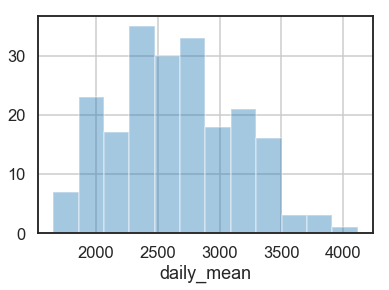

In [27]:
sns.distplot(atoc.daily_mean, kde=False)

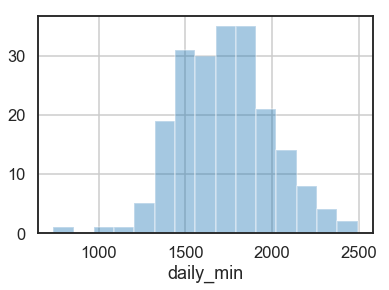

In [28]:
sns.distplot(atoc.daily_min, kde=False)

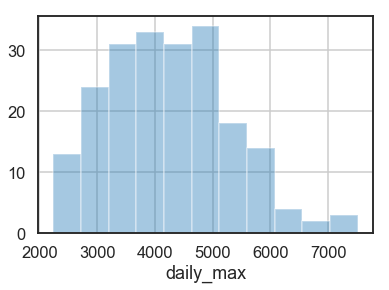

In [29]:
sns.distplot(atoc.daily_max, kde=False)

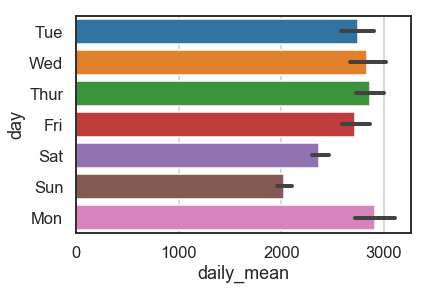

In [30]:
sns.barplot(y='day', x='daily_mean', data=atoc, orient='h')

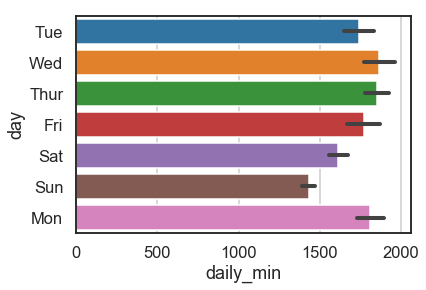

In [31]:
sns.barplot(y='day', x='daily_min', data=atoc, orient='h')

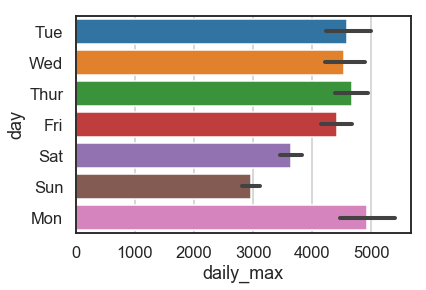

In [32]:
sns.barplot(y='day', x='daily_max', data=atoc, orient='h')

Approaches to dealing with the large number of NAN in A to B which will be significant
There are only 6 figures for the pm figure 27 for eve and 16 for early morning. Not enough for a conclusion

1 Use existing data and expand to the 206 days
Easy, some kind of reliable data that might affect when people travel
but would completely ignore differences in days of the week etc

2 Just use the daily mean
gives a sense of the range and daily variation
ok but will not get the difference in range we need to make a difference

3 ignore data completely as insufficient and misleading

4 Use daily mean for journey A to B but adjust for arrival time ie 8-9 hours after departure time and add BtoC